In [ ]:
"""
Auteurs: ELOUAHDANI Salim et GUENNOUNI Yassine
Date et lieu: Année 2022/2023 au Lycée Henri Poincaré
Description: Simulation de la position et de la vitesse d'un projectile traversant un coilgun composé d'UNE bobine
"""

In [4]:
import math as math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits import mplot3d                                                                    

In [5]:
Rbob=2*(10**-2) #Largeur de la bobine
Lbob=8.5*(10**-2) #Longeur de la bobine
μ0=1.257*(10**(-6)) #Constance magnétique
Nbob=500  #Nombre de spire
n=Nbob/Lbob
C=0.01 #Capacité du condensateur
R=8  #Résistance
L=0.08 #Induction de la Bobine
E=1000 #Tension aux bornes du GBF       
w0=1/((L*C)**0.5)  #Pulsation propre du circuit RLC série
Q=1/R*((L/C)**0.5) #Facteur de qualité
rmoins=-w0/(2*Q)-w0/(2*Q)*((1-4*Q**2)**0.5)
rplus=-w0/(2*Q)+w0/(2*Q)*((1-4*Q**2)**0.5)
l=0.4 #Distance pour les bornes du tracé
M=6.8 #Moment magnétique 
m=0.051 #Masse de l'aimant                                                                        


In [6]:
def i_régime_critique (t):
    r=w0/(2*Q)
    return (-r**2)*E*C*math.exp(r*t)

def i_régime_apériodique (t):
    rmoins=-w0/(2*Q)-w0/(2*Q)*((1-4*Q**2)**0.5)
    rplus=-w0/(2*Q)+w0/(2*Q)*((1-4*Q**2)**0.5)
    return -(rmoins*rplus*E*C)/(rmoins-rplus)*(math.exp(rplus*t)-math.exp(rmoins*t))

def i_régime_pseudo_périodique (t):
    p=-R/(2*L)
    q=w0*((4-(1/Q)**2)**0.5)
    return -E*C*math.exp(p*t)*math.sin(q*t)*((p**2)/q+q)

def i(temps):
    if Q==1/2:
        return i_régime_critique(temps)
    elif Q<1/(2) :
        return i_régime_apériodique(temps)
    elif Q>1/(2):
        return i_régime_pseudo_périodique(temps)

def forcemag(x,t):
   return -M*μ0*n*i(t)/2*(1/((Rbob**2+x**2)**1.5)-1/((Rbob**2+(x-Lbob)**2)**1.5))*Rbob**2

def équation(X,t):
    x,dxdt=X
    u=dxdt
    dudt=forcemag(x,t)/m #-(0.4/m)*u
    return [dxdt,dudt]

In [7]:
T=np.linspace(0,1,10000)
x0=0.1
v0=0

solution=odeint(équation,[x0,v0],T)

position=solution[:,0]
V=solution[:,1]

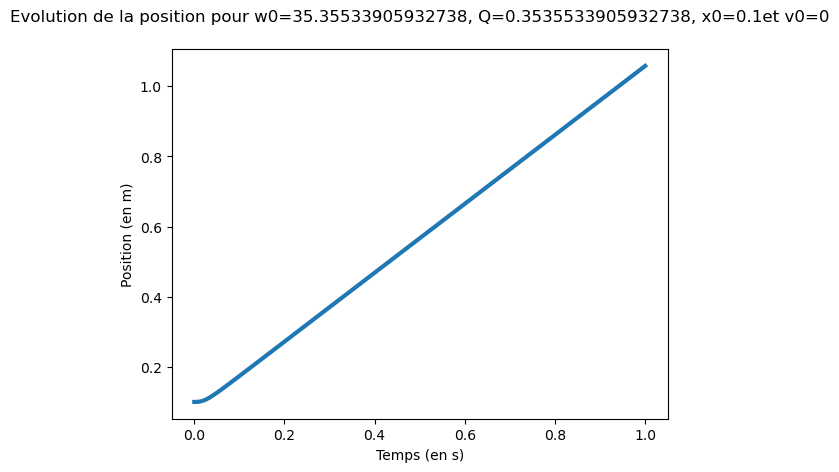

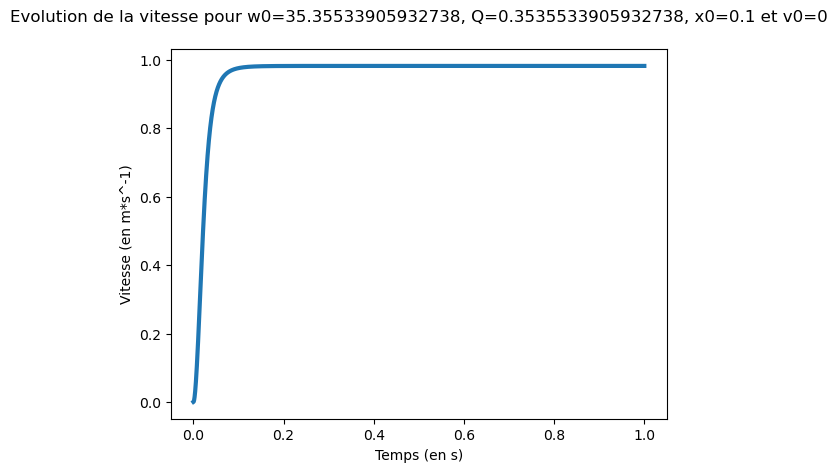

In [8]:
plt.plot(T,position, linewidth = 3)
plt.title('Evolution de la position pour w0='+str(w0)+', Q='+str(Q)+', x0='+str(x0)+'et v0='+str(v0),pad=20)
plt.xlabel('Temps (en s)')
plt.ylabel('Position (en m)')
plt.show()

plt.plot(T,V, linewidth = 3)
plt.xlabel('Temps (en s)')
plt.ylabel('Vitesse (en m*s^-1)')
plt.title('Evolution de la vitesse pour w0='+str(w0)+', Q='+str(Q)+', x0='+str(x0)+' et v0='+str(v0),pad=20)
plt.show()

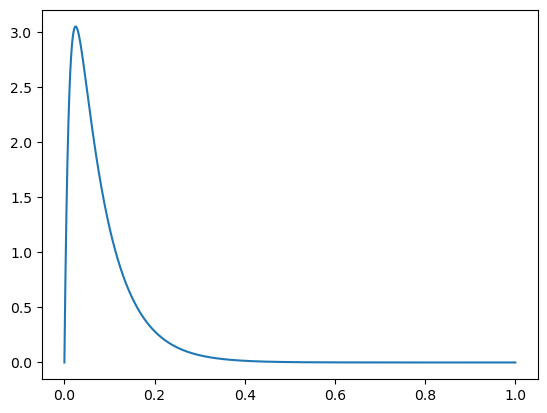

In [9]:
I = [i(t) for t in T]
plt.plot(T,I)
plt.show()